EGM722 Project - Lighting Column Replacements and Drainage Cleaning for MMaRC Network B. 

The M20 is one of.....

Import the required packages 

In [2]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
import matplotlib.lines as mline
import folium
from folium.plugins import MeasureControl
from folium.features import FeatureGroup
from folium import TileLayer

In [3]:
MarkerPosts = gpd.read_file('data_files/MarkerPost_100M.shp')
# 100 meter marker delineations for the M20. These are used by operatives to get there approximate location on the Motorway. Point Data
Filter_Drains = gpd.read_file('data_files/FD_Filter_Drain.shp')
# Part of the Motorway Drainage System that requires annual inspection and cleaning if necessary. Linear Data
Gully = gpd.read_file('data_files/GY_Gully.shp')
# Part of the Motorway Drainage System that requires bi-annual inspection and cleaning. Point Data
Junctions = gpd.read_file('data_files/Junctions.shp')
# Shows location and name of the Junctions on the M20. Point Data
Lighting_Column = gpd.read_file('data_files/LP_Lighting_Point.shp')
# Lighting Columns present on the M20
Boundary = gpd.read_file('data_files/MMaRC_B_Boundary.shp')
# The working boundary of the MMaRC Network B

Display the Lighting Column Data

In [5]:
Lighting_Column.head(12)

,Network_Na,Route_Numb,Direction,Marker_Pos,Asset_Type,Asset_Inve,Unique_Ass,ITM_Eastin,ITM_Northi,Latitude,...,Column_Mat,EIWO_Numbe,GlobalID,created_us,created_da,last_edite,last_edi_1,Junction,ScheduledF,geometry
0,B,M20,East,M20 94.1 E,Lighting Point/Lighting Column,LP,LP-1899,556963.568,653355.690,52.629718,...,Steel,None,{188ACE84-4585-4F24-A73A-9B3BC82A4410},None,NaT,COATESR,2025-04-08,M20 J2,Yes,POINT (556963.568 653355.69)
1,B,M20,East,M20 94.1 E,Lighting Point/Lighting Column,LP,LP-1900,556984.116,653385.186,52.629985,...,Steel,None,{94701500-B741-49D6-973B-7806592B8A04},None,NaT,COATESR,2025-04-08,M20 J2,Yes,POINT (556984.116 653385.186)
2,B,M20,East,M20 94.2 E,Lighting Point/Lighting Column,LP,LP-1901,557003.843,653413.185,52.630238,...,Steel,None,{B6BE6F6F-D41C-4E62-AEB0-D1487BA2F95B},None,NaT,COATESR,2025-04-08,M20 J2,Yes,POINT (557003.843 653413.185)
3,B,M20,West,M20 94.3 W,Lighting Point/Lighting Column,LP,LP-1902,557201.928,653425.868,52.630368,...,Steel,None,{8935E4AE-C2B9-4451-8197-0B1517D57CC9},None,NaT,COATESR,2025-04-08,M20 J2,Yes,POINT (557201.928 653425.868)
4,B,M20,West,M20 94.3 W,Lighting Point/Lighting Column,LP,LP-1903,557181.100,653398.036,52.630116,...,Steel,None,{C4937FF3-AEB7-4CD2-809F-226F5C888867},None,NaT,COATESR,2025-04-08,M20 J2,Yes,POINT (557181.1 653398.036)
5,B,M20,West,M20 94.3 W,Lighting Point/Lighting Column,LP,LP-1904,557159.864,653370.351,52.629865,...,Steel,None,{9F631775-2CF2-4C71-8782-26FB54DC62A9},None,NaT,COATESR,2025-04-08,M20 J2,Yes,POINT (557159.864 653370.351)
6,B,M20,South,M20 94.2 W,Lighting Point/Lighting Column,LP,LP-1905,557150.910,653343.831,52.629626,...,Steel,None,{83B55F1C-95E6-4B15-B3BB-92415C3CD84A},None,NaT,COATESR,2025-04-08,M20 J2,No,POINT (557150.91 653343.831)
7,B,M20,South,M20 94.2 E,Lighting Point/Lighting Column,LP,LP-1906,557064.063,653435.589,52.630444,...,Steel,None,{2A4BA236-8D15-42A3-859B-D0FE1F8088D5},None,NaT,COATESR,2025-04-08,M20 J2,No,POINT (557064.063 653435.589)
8,B,M20,South,M20 94.2 E,Lighting Point/Lighting Column,LP,LP-1907,557071.040,653418.216,52.630288,...,Steel,None,{980CCE55-D89B-4D7A-B958-7E634B900F24},None,NaT,COATESR,2025-04-08,M20 J2,No,POINT (557071.04 653418.216)
9,B,M20,South,M20 94.2 W,Lighting Point/Lighting Column,LP,LP-1908,557089.248,653395.567,52.630086,...,Steel,None,{E57BD9E2-78F0-4BA2-A7D7-C082806E1438},None,NaT,COATESR,2025-04-08,M20 J2,No,POINT (557089.248 653395.567)


Graph of the number of lighting columns to be upgraded at each Junction

Create a map to display the Lighting Columns, Marker Posts, Junctions, Gullies, Filter Drains and Boundary data

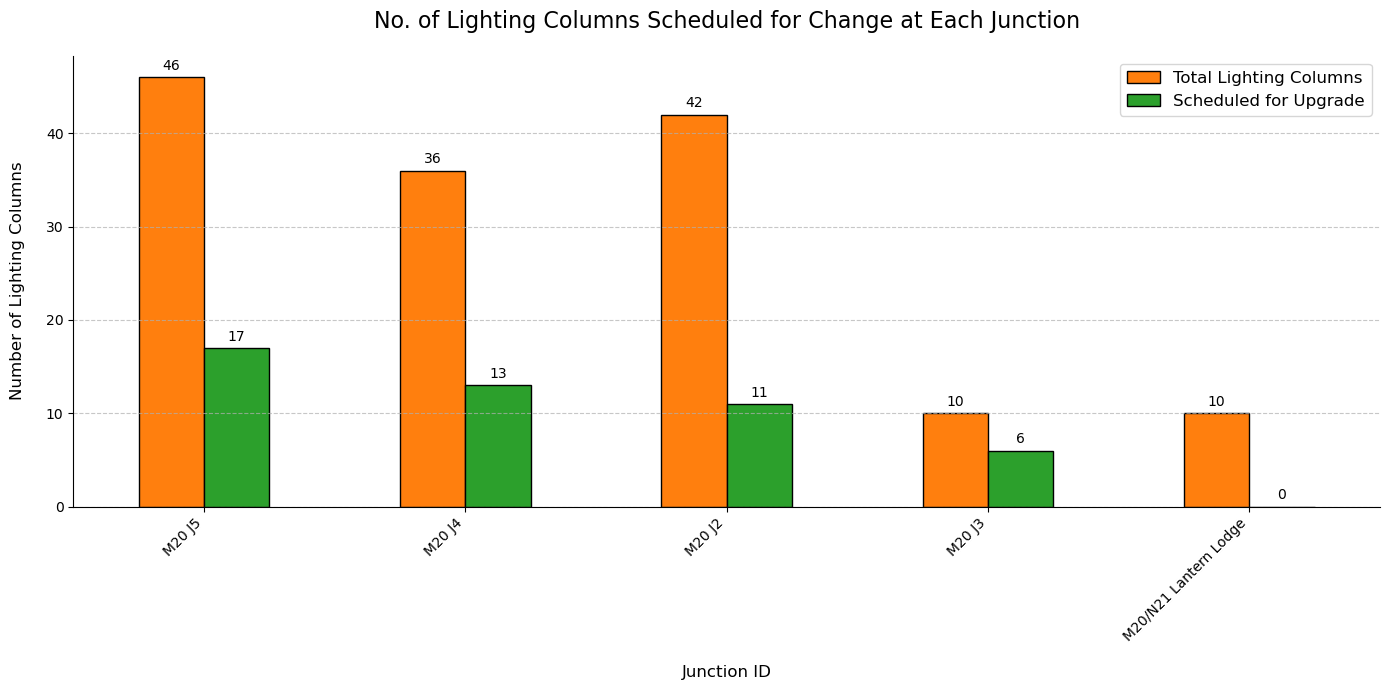

In [7]:
# Create a Bar Chart showing No. of Lighting Columns to be upgraded at each Junction
junction_counts = Lighting_Column.groupby('Junction').agg(
    Total_Lamps=('Unique_Ass', 'count'),  # Count all lighting columns per junction
    Lamps_to_Change=('ScheduledF', lambda x: (x == 'Yes').sum())  # Count "Yes" in ScheduledF
).reset_index()

# Sort by most scheduled changes
junction_counts = junction_counts.sort_values('Lamps_to_Change', ascending=False)

# Define the colors of the bars
colors = ['#ff7f0e', '#2ca02c']  # Orange and Green

# --- Plot the Bar Chart ---
plt.figure(figsize=(14, 7))
ax = plt.subplot(111)

# Plot the bars
bars = junction_counts.head(10).plot(
    x='Junction',
    y=['Total_Lamps', 'Lamps_to_Change'],
    kind='bar',
    ax=ax,
    color=colors,
    edgecolor='black'
)

# Bar chart styling
plt.title('No. of Lighting Columns Scheduled for Change at Each Junction', fontsize=16, pad=20)
plt.xlabel('Junction ID', fontsize=12, labelpad=15)
plt.ylabel('Number of Lighting Columns', fontsize=12, labelpad=15)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
ax.spines[['top', 'right']].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Display the No. of Columns on top of the bars in the chart
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=10, color='black', fmt='%d')

# Legend and layout
plt.legend(['Total Lighting Columns', 'Scheduled for Upgrade'], fontsize=12, bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [13]:
from folium.plugins import MeasureControl

# Convert all layers to WGS84 (EPSG:4326)
Lighting_Column = Lighting_Column.to_crs("EPSG:4326")
MarkerPosts = MarkerPosts.to_crs("EPSG:4326")
Junctions = Junctions.to_crs("EPSG:4326")
Boundary = Boundary.to_crs("EPSG:4326")
Gully = Gully.to_crs("EPSG:4326")
Filter_Drains = Filter_Drains.to_crs("EPSG:4326")

# Create base map that zooms into Junction 5 - The first junction that works are scheduled for.
m = folium.Map(
    location=[52.5856, -8.7211],
    zoom_start=18,
    tiles="Esri.WorldImagery"
)

# Add OpenStreetMap as additional base layer. The basemaps can be changed 
TileLayer('OpenStreetMap', name='OpenStreetMap').add_to(m)


# Add Boundary polygon
Boundary.explore(
    m=m,
    color='red',
    style_kwds={'fill': False},
    name='MMaRC_B_Boundary'
)

# Add Gully points
Gully.explore(
    m=m,
    color='yellow',
    marker_kwds={
        'radius': 5,
        'fill': True,
        'fillColor': 'yellow',
        'fillOpacity': 1,
        'weight': 1
    },
    name='Gully'
)

# Add Filter Drains lines
Filter_Drains.explore(
    m=m,
    color='blue',
    style_kwds={'weight': 1.5},
    name='Filter Drains'
)

# Add Junctions 
for idx, row in Junctions.iterrows():
    if not row.geometry.is_empty and pd.notnull(row['Junction_N']):
        folium.Marker(
            location=[row.geometry.y, row.geometry.x],
            icon=folium.Icon(
                color='lightred',
                icon='map-pin',
                prefix='fa',
                icon_size=(25, 25)
            )
        ).add_to(m)
        
        # Label
        label = folium.DivIcon(
            html=f"""<div style="
                color: lightred;
                font-size: 20px;
                font-weight: bold;
                text-shadow: -1px -1px 0 #fff, 1px -1px 0 #fff, -1px 1px 0 #fff, 1px 1px 0 #fff;
                position: absolute;
                transform: translate(-50%, -125%);
                z-index: 9999;">{row['Junction_N']}</div>"""
        )
        folium.Marker(
            location=[row.geometry.y, row.geometry.x],
            icon=label,
            icon_size=(0, 0)
        ).add_to(m)

# Add Lighting Columns
Lighting_Column.explore(
    m=m,
    column='ScheduledF',
    categorical=True,
    categories=['Yes', 'No'],
    cmap=['green', 'orange'],
    marker_kwds={'radius': 7},
    name='Lighting Columns'
)

# Add Marker Posts
MarkerPosts.explore(
    m=m,
    color='red',
    marker_kwds={'radius': 5},
    name='Marker Posts'
)

# Unified legend
legend_html = """
<div style="
    position: fixed; 
    bottom: 50px; 
    left: 50px; 
    z-index: 1000;
    background-color: white;
    border: 2px solid grey;
    border-radius: 5px;
    padding: 10px;
    font-size: 12px;">
    <h4 style="margin:0 0 5px 0;">Legend</h4>
    
    <!-- Junctions -->
    <div style="margin-bottom: 5px;">
        <div style="display: flex; align-items: center; margin-bottom: 5px;">
            <div style="color: lightred; font-size: 18px; margin-right: 5px;">
                <i class="fa fa-map-pin"></i>
            </div>
            Junctions
        </div>
    </div>
    
    <!-- Boundary -->
    <div style="display: flex; align-items: center; margin-bottom: 5px;">
        <div style="border: 2px solid red; width: 20px; height: 0; margin-right: 5px;"></div>
        Boundary
    </div>
    
    <!-- Gully -->
    <div style="display: flex; align-items: center; margin-bottom: 5px;">
        <div style="background-color: yellow; width: 20px; height: 20px; border: 1px solid black; border-radius: 50%; margin-right: 5px;"></div>
        Gully
    </div>
    
    <!-- Filter Drains -->
    <div style="display: flex; align-items: center; margin-bottom: 5px;">
        <div style="border-bottom: 2px solid blue; width: 20px; margin-right: 5px;"></div>
        Filter Drains
    </div>
    
    <!-- Lighting Columns -->
    <div style="margin-bottom: 5px;">
        <div style="display: flex; align-items: center; margin-bottom: 5px;">
            <div style="background-color: green; width: 20px; height: 20px; border-radius: 50%; margin-right: 5px;"></div>
            Lighting Columns To Be Upgraded 
        </div>
        <div style="display: flex; align-items: center;">
            <div style="background-color: orange; width: 20px; height: 20px; border-radius: 50%; margin-right: 5px;"></div>
            Lighting Columns to Remain As Is
        </div>
    </div>
    
    <!-- Marker Posts -->
    <div style="display: flex; align-items: center; margin-bottom: 5px;">
        <div style="background-color: red; width: 20px; height: 20px; border-radius: 50%; margin-right: 5px;"></div>
        Marker Posts - M20
    </div>
</div>"""
m.get_root().html.add_child(folium.Element(legend_html))

# Add labels for Lighting Columns
for idx, row in Lighting_Column.iterrows():
    if not row.geometry.is_empty and pd.notnull(row['Unique_Ass']):
        label_color = 'green' if row['ScheduledF'] == 'Yes' else 'orange'
        label = folium.DivIcon(
            html=f"""<div style="
                color: {label_color};
                font-size: 12px;
                font-weight: bold;
                text-shadow: -1px -1px 0 #fff, 1px -1px 0 #fff, -1px 1px 0 #fff, 1px 1px 0 #fff;
                position: absolute;
                transform: translate(-50%, -100%);
                z-index: 9999;">{row['Unique_Ass']}</div>"""
        )
        folium.Marker(
            location=[row.geometry.y, row.geometry.x],
            icon=label,
            icon_size=(0, 0)
        ).add_to(m)

# Add Marker Post labels
for idx, row in MarkerPosts.iterrows():
    if not row.geometry.is_empty and pd.notnull(row['mVal']):
        label = folium.DivIcon(
            html=f"""<div style="
                color: white;
                font-size: 12px;
                font-weight: bold;
                text-shadow: -1px -1px 0 #000, 1px -1px 0 #000, -1px 1px 0 #000, 1px 1px 0 #000;
                position: absolute;
                transform: translate(-50%, -100%);
                z-index: 9999;">{row['mVal']}</div>"""
        )
        folium.Marker(
            location=[row.geometry.y, row.geometry.x],
            icon=label,
            icon_size=(0, 0)
        ).add_to(m)

# Add Gully labels
for idx, row in Gully.iterrows():
    if not row.geometry.is_empty and pd.notnull(row['Unique_Ass']):
        label = folium.DivIcon(
            html=f"""<div style="
                color: black;
                font-size: 12px;
                font-weight: bold;
                text-shadow: -1px -1px 0 #fff, 1px -1px 0 #fff, -1px 1px 0 #fff, 1px 1px 0 #fff;
                position: absolute;
                transform: translate(-50%, -100%);
                z-index: 9999;">{row['Unique_Ass']}</div>"""
        )
        folium.Marker(
            location=[row.geometry.y, row.geometry.x],
            icon=label,
            icon_size=(0, 0)
        ).add_to(m)

# Add Filter Drains labels
for idx, row in Filter_Drains.iterrows():
    if not row.geometry.is_empty and pd.notnull(row['Unique_Ass']):
        centroid = row.geometry.centroid
        label = folium.DivIcon(
            html=f"""<div style="
                color: blue;
                font-size: 12px;
                font-weight: bold;
                text-shadow: -1px -1px 0 #fff, 1px -1px 0 #fff, -1px 1px 0 #fff, 1px 1px 0 #fff;
                position: absolute;
                transform: translate(-50%, -100%);
                z-index: 9999;">{row['Unique_Ass']}</div>"""
        )
        folium.Marker(
            location=[centroid.y, centroid.x],
            icon=label,
            icon_size=(0, 0)
        ).add_to(m)

# Add Font Awesome CSS
m.get_root().header.add_child(folium.Element(
    '<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css">'
))

# Add controls
MeasureControl(position="bottomleft", primary_length_unit="meters").add_to(m)
folium.LayerControl().add_to(m)

m  # Display map